In [33]:
import pandas as pd

In [34]:
df=pd.read_csv(r"C:\Users\ankit kumar jha\Downloads\insurance[1].csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
print(df.shape)

(1338, 7)


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [37]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [38]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [39]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [40]:
df.drop_duplicates(inplace=True)

In [41]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges


In [42]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [43]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)


In [44]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
age,1.000000,0.019814,0.109344,0.041536,-0.025587,0.298308,0.001495,-0.012311,0.009415
sex,0.019814,1.000000,-0.046397,-0.017848,-0.076596,-0.058044,0.012482,-0.017578,0.003767
bmi,0.109344,-0.046397,1.000000,0.012755,0.003746,0.198401,-0.136138,0.270057,-0.006211
children,0.041536,-0.017848,0.012755,1.000000,0.007331,0.067389,0.026044,-0.023492,0.021538
smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,0.787234,-0.036321,0.068282,-0.037168
charges,0.298308,-0.058044,0.198401,0.067389,0.787234,1.000000,-0.038695,0.073578,-0.043637
region_northwest,0.001495,0.012482,-0.136138,0.026044,-0.036321,-0.038695,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,-0.017578,0.270057,-0.023492,0.068282,0.073578,-0.345909,1.000000,-0.346614
region_southwest,0.009415,0.003767,-0.006211,0.021538,-0.037168,-0.043637,-0.320493,-0.346614,1.000000


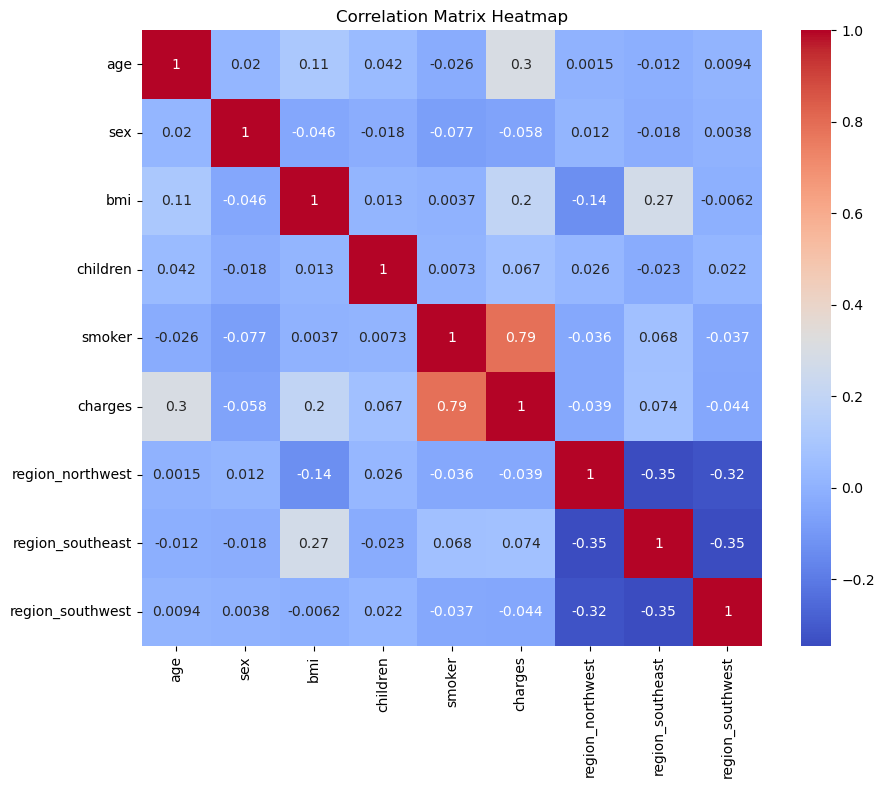

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [46]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


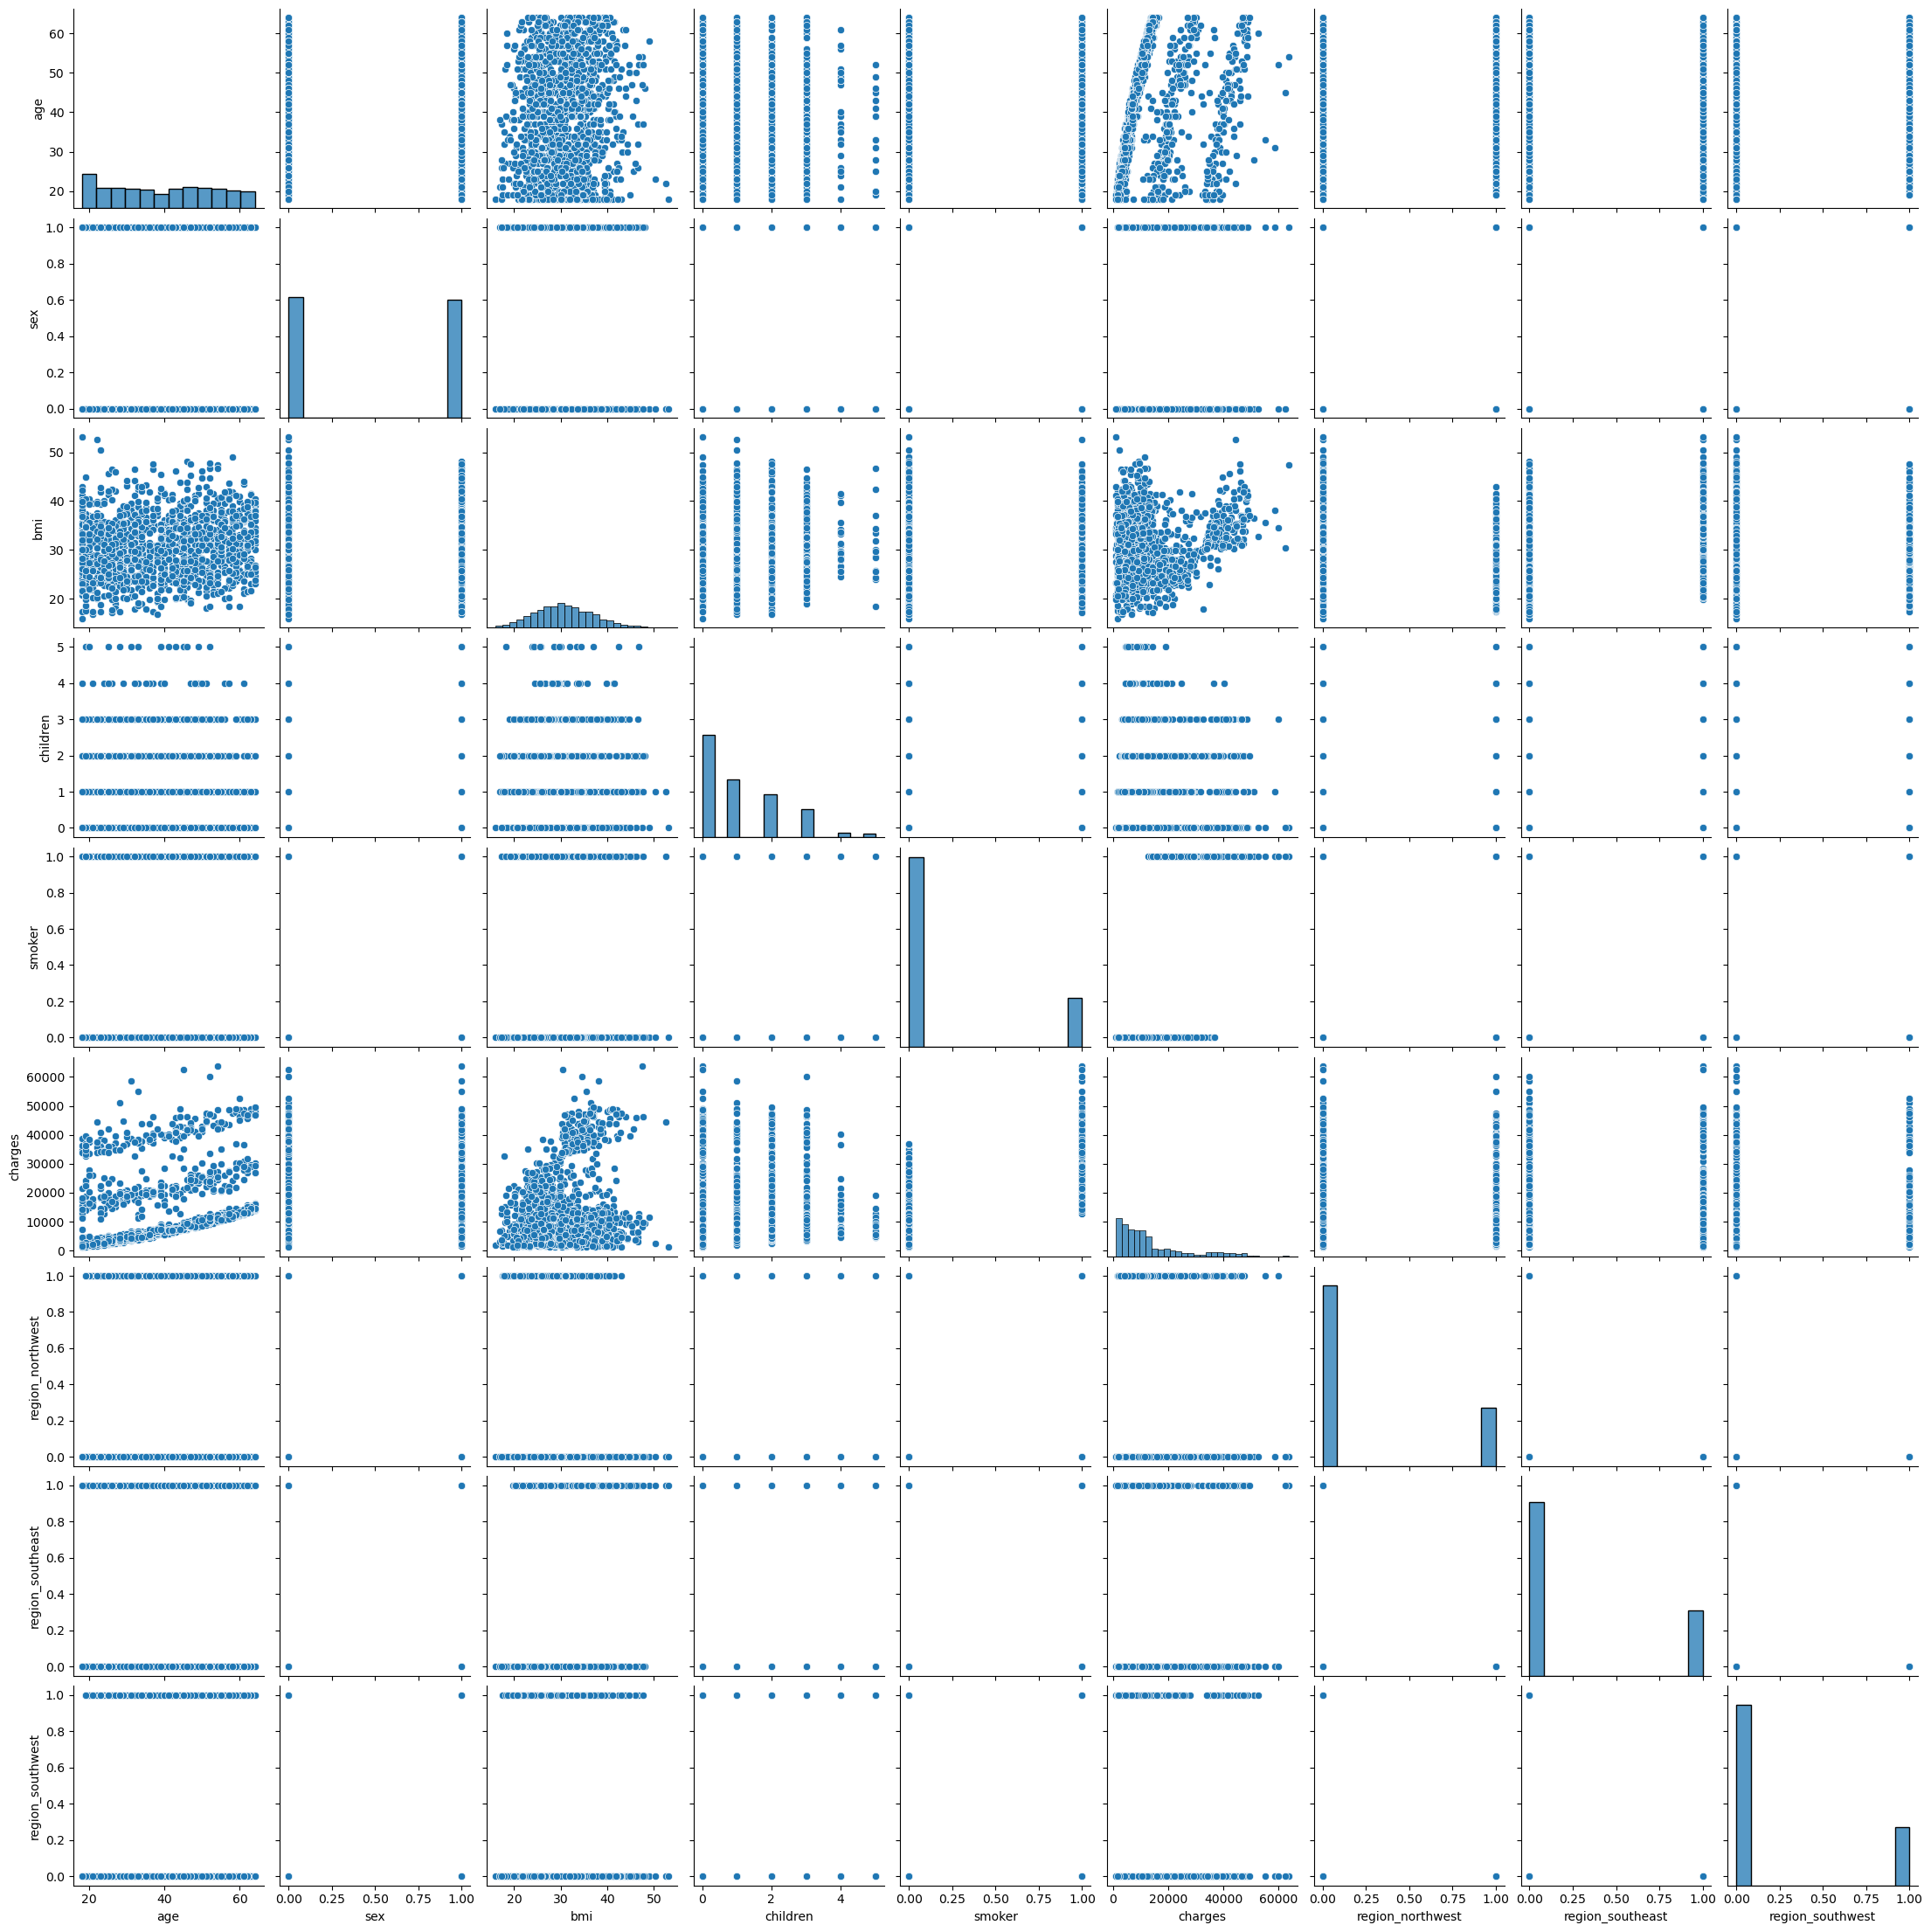

In [48]:
sns.pairplot(df)

In [49]:
x=df.drop('charges', axis=1)
y=df['charges']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = model.predict(X_test)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [58]:
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE):  {mae:.2f}")
print(f"Mean Squared Error (MSE):  {mse:.2f}")
print(f"Root Mean Squared Error:   {rmse:.2f}")
print(f"R² Score:                   {r2:.4f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE):  4177.05
Mean Squared Error (MSE):  35478020.68
Root Mean Squared Error:   5956.34
R² Score:                   0.8069


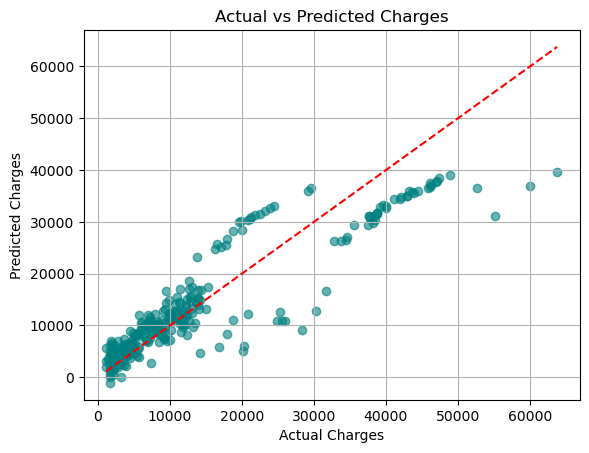

In [60]:
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()